<a href="https://colab.research.google.com/github/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/ACD_T3_Testes_de_Hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Testes de Hipóteses 

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

Antes de entrarmos nos testes de hipóteses vamos recordar o que são as distribuições de probabilidade e os principais gráficos envolvidos. Se você está confortável com esses conceitos pode saltar e ir diretamente para os testes de hipóteses. Ao final é importante que você saiba construir e interpretar gráficos de distribuição de probabilidade e distribuição acumulada. Os itens importantes estão com '*' no título da seção. 

# Probabilidade e Distribuições



Imagine uma caixa com 10 bolas de bilhar, 5 vermelhas, 2 azuis e 3 amarelas. Abaixo você pode ver representada a frequência, isto é quantidade, de cada uma das cores na caixa.

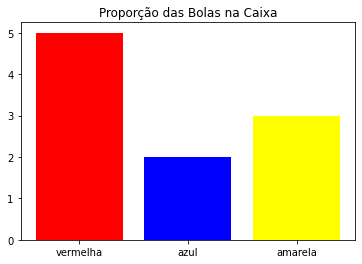

In [130]:
import matplotlib.pyplot as plt

plt.bar(['vermelha','azul','amarela'],[5,2,3], color=['red','blue','yellow'])
plt.title('Proporção das Bolas na Caixa')
plt.show()

Imagine agora que você vai tirar uma bola da caixa sem olhar para bola que irá retirar. Qual cor você imagina será mais provável retirar da caixa? 
Se você respondeu *vermelha* você certamente já tem a intuição do quê é a probabilidade de um evento. A probabilidade, em uma perspectiva  *frequentista*, considera a frequência (as quantidades) que ocorrem de cada valor, sendo o caso mais provável a cor que aparece em maior proporção. No caso do nosso exemplo, a probabilidade de você tirar cada uma das cores é simplesmente:

$$ p(X=vermelha) = \frac{\text{bolas vermelhas}}{\text{total de bolas}} = 5/10 = 0.5  $$ 

$$ p(X=azul) = \frac{\text{bolas azuis}}{\text{total de bolas}} = 2/10 = 0.2  $$ 

$$ p(X=amarela) = \frac{\text{bolas amarelas}}{\text{total de bolas}} = 3/10 = 0.3  $$ 

E podemos então dizer que a probabilidade de um evento, um valor $x_i$, é dada por:

$$ p(X=x_i) = \frac{\text{nr de casos de } x_i}{\text{nr de todos casos possíveis}} $$ 

Você pode notar que a soma da probabilidade de todos os casos é $1$:

$$ p(X=vermelha) + p(X=azul) + p(X=amarela) = 0.5 + 0.3 + 0.2 = 1  $$ 

e este é um resultado geral sobre probabilidades:

$$ \sum_i^n p(X=x_i) = 1 $$ 

Do mesmo modo que fizemos com as quantidades, dividindo a frequência de cada cor pelo total de bolas na caixa, podemos representar a *proporção* ou a probabilidade de cada cor: 

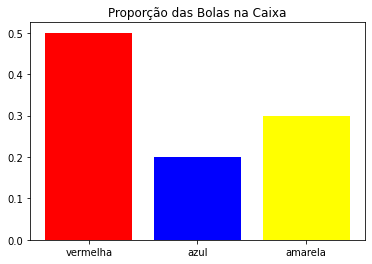

In [131]:
import matplotlib.pyplot as plt

plt.bar(['vermelha','azul','amarela'],[5/10,2/10,3/10], color=['red','blue','yellow'])
plt.title('Proporção das Bolas na Caixa')
plt.show()

Você acaba de descobrir uma **função de distribuição de probabilidades** e o gráfico acima á um gráfico de distribuição de probabilidades.

## Distribuições de Probabilidade

As distribuições de probabilidade são um conceito fundamental em estatística. Para dados univariados, funções de distribuição de probabilidades fornecem um modelo dos dados que desempenha um papel fundamental no cálculo de intervalos de confiança, testes de hipóteses, inferências estatísticas, simulações etc.

A definição matemática de uma **função de probabilidade discreta**, $p(x)$, é uma função com as seguintes propriedades:

1. Fornece $p(x_i)$ a probabilidade de que $x_i$ possa assumir um determinado valor:

$$ P[ X = x_i ] = p(x_i) $$

2. $p(x)$ é não negativo para todo valor $x$.

$$ p(x_i) \ge 0 \text{ , para } \forall i$$

3. A soma de $p(x)$ para todos os valores possíveis de $x_i$ é 1

$$ \sum_i p(x_i) = 1$$

E como consequência de 2. e 3. temos $0 \le p(x_i) \le 1$ para $\forall i$.

Pelo nosso exemplo da caixa com bolas coloridas é exatamente o que você esperava encontrar, não é? 

Uma função de probabilidade discreta é uma função que pode assumir um número discreto de valores (não necessariamente finitos). No nosso exemplo, existem somente 3 casos correspondentes às 3 cores na caixa. Mas de modo análogo podemos **definir funções de probabilidades contínuas** e suas correspondentes distribuições. 

$$ P[ a \le x \le b ] = \int_a^b p(x) $$

$$ p(x) \ge 0 \text{ , para } \forall x$$

$$ \int_{-\infty}^{+\infty} p(x) = 1$$

Para essas funções $P(x)$, tanto no caso discreto como no caso contínuo, podemos criar gráficos que são bastante úteis para entendermos os dados. 

Um gráfico que exibe a probabilidade $P(X=x)$ para cada valor de $x$ é um **gráfico de densidade de probabilidade** e ainda é comum empregarmos um **gráfico de densidade de probabilidade acumulada** exibindo os valores de $P(X \le x)$ para todo $x$. Essas funções são normalmente conhecidas como **PDF** (Probability Density Function) e **CDF** (Cumulative Density Function). 

É importante você notar que, assim como no caso discreto, em que a somatória de todos os valores de probabilidade possíveis é 1, temos no caso de variáveis contínuas a igualdade $ \int_{-\infty}^{+\infty} p(x) = 1$, o quê significa que a área sob a curva da PDF terá valor 1.

Se você tem alguma familiaridade com funções de probabilidade de cursos de probabilidade e estatística pode achar útil os gráficos abaixo. Eles resumem o uso dessas funções PDF e CDF para uma distribuição discreta (binomial) e uma distribuição contínua (distribuição normal), e você pode reconhecer o limites empregados para obter as diferentes probabilidades de um intervalo de valores. Há ainda os gráficos de probabilidade acumulada inversa que permitem obter os valores a partir de uma probabilidade dada. 

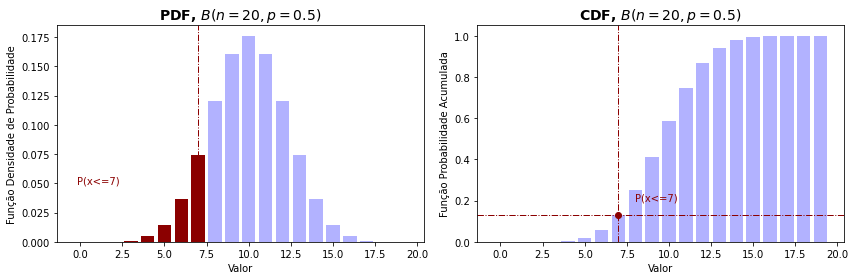

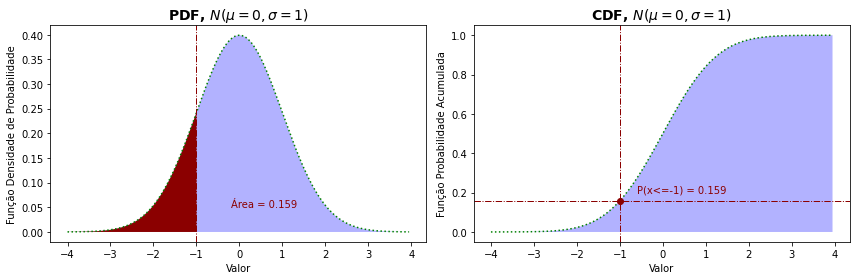

In [184]:
from scipy.stats import norm, binom

n = 20
p = 0.5

x = np.arange(0,n,1)

prob = []

for xi in x:
  prob.append(binom.pmf(n=n,p=p,k=xi))

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.bar(x,prob,color='blue',linewidth=1.5, alpha=0.3) 
plt.xlabel('Valor')
plt.ylabel('Função Densidade de Probabilidade')
plt.title('PDF, $B(n=20, p=0.5)$', fontsize=14, weight='bold') 

plt.bar([0,1,2,3,4,5,6,7],height=[prob[i] for i in range(8)],color='darkred') 
plt.axvline(7,linewidth=1,linestyle='-.',color='darkred') 
plt.text(-0.2, 0.05, f'P(x<=7)', fontsize=10,color='darkred') 

prob =[ ]

for xi in x:
  prob.append(binom.cdf(n=n,p=p,k=xi))

plt.subplot(1, 2, 2)
plt.bar(x,prob,color='blue',linewidth=1.5,linestyle=':', alpha=0.3) 
plt.xlabel('Valor')
plt.ylabel('Função Probabilidade Acumulada')
plt.title('CDF, $B(n=20, p=0.5)$', fontsize=14, weight='bold') 

plt.axvline(7,linewidth=1,linestyle='-.',color='darkred')
plt.axhline(binom.cdf(n=n,p=p,k=7), linewidth=1,linestyle='-.',color='darkred')   
plt.plot(7, binom.cdf(n=n,p=p,k=7),'o',color='darkred')  
plt.text(8, 0.2, f'P(x<=7)', fontsize=10,color='darkred') 

plt.tight_layout()
plt.show()

prob = []

x =  np.arange(-4,4,0.05)

for xi in x:
  prob.append(norm.pdf(xi))

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(x,prob,c='green',linewidth=1.5,linestyle=':')
plt.fill_between(x,prob, facecolor='blue', alpha=0.3)    
plt.fill_between(np.arange(-4,-0.95,0.05), prob[0:len(np.arange(-4,-0.95,0.05)+1)], facecolor='darkred')     
plt.xlabel('Valor')
plt.ylabel('Função Densidade de Probabilidade')
plt.title('PDF, $N(\mu=0, \sigma=1)$', fontsize=14, weight='bold') 

plt.axvline(-1,linewidth=1,linestyle='-.',color='darkred') 
plt.text(-0.2, 0.05, f'Área = { norm.cdf(-1) :.3f}', fontsize=10,color='darkred') 

prob =[ ]

for xi in x:
  prob.append(norm.cdf(xi))

plt.subplot(1, 2, 2)
plt.plot(x,prob,c='green',linewidth=1.5,linestyle=':')
plt.fill_between(x,prob, facecolor='blue', alpha=0.3)    
plt.xlabel('Valor')
plt.ylabel('Função Probabilidade Acumulada')
plt.title('CDF, $N(\mu=0, \sigma=1)$', fontsize=14, weight='bold') 

plt.axvline(-1,linewidth=1,linestyle='-.',color='darkred') 
plt.axhline(norm.cdf(-1), linewidth=1,linestyle='-.',color='darkred')   
plt.plot(-1,norm.cdf(-1),'o',color='darkred')  
plt.text(-0.6, 0.2, f'P(x<=-1) = { norm.cdf(-1) :.3f}', fontsize=10,color='darkred') 

plt.tight_layout()
plt.show() 


## Exemplo*

Este exemplo mostra como esses gráficos podem ser empregados para uma aproximação de inferências estatísticas e esse é um uso bastante prático das visualizações. Essas aproximações podem ser, em seguida, refinadas com a obtenção exatas das probabilidades ou valores. 

**Exemplo**. Sabendo que a média de peso de recém nascidos é de 3kg com um desvio padrão de 1kg, podemos empregar isso para determinar a probabilidade de termos bêbes abaixo de 2kg e, assim antecipar e planejar as necessidades de atendimento especial dos recém nascidos (alimentação, maior período de internação etc.). 



In [133]:
from IPython.display import display, Math, Latex 
p = norm.cdf(2,loc=3,scale=1)

Math('P(x \le 2) = ' +  f'{p :.3f}')  

<IPython.core.display.Math object>

O resultado é de cerca de 16% e, portanto, se tivermos 20 nascimentos diários é necessário estarmos preparados para atender até 4 nascimentos requerendo cuidados especiais.

Nosso objetivo aqui é apenas mostrar como essa probabilidade pode ser observada nos gráficos de distribuição de probabilidades e de probabilidade acumulada mesmo antes de você fazer o cálculo das probabildades e valores! 



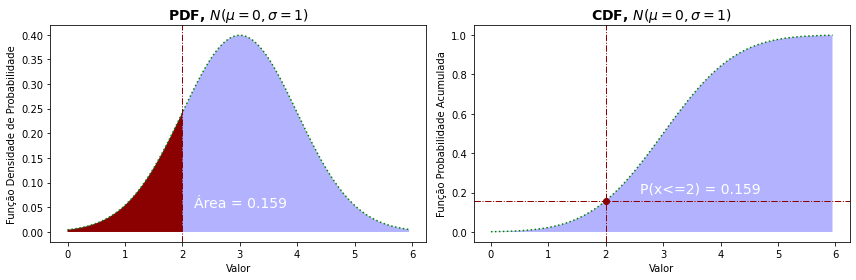

In [134]:
media = 3
sd = 1

prob = []

x =  np.arange(0,media+3*sd,0.05)

for xi in x:
  prob.append(norm.pdf(xi, loc=media, scale=sd))

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(x,prob,c='green',linewidth=1.5,linestyle=':')
plt.fill_between(x,prob, facecolor='blue', alpha=0.3)    
plt.fill_between(np.arange(0,2.05,0.05), prob[0:len(np.arange(0,2.05,0.05)+1)], facecolor='darkred')     
plt.xlabel('Valor')
plt.ylabel('Função Densidade de Probabilidade')
plt.title('PDF, $N(\mu=0, \sigma=1)$', fontsize=14, weight='bold') 

plt.axvline(2,linewidth=1,linestyle='-.',color='darkred') 
plt.text(2.2, 0.05, f'Área = { norm.cdf(-1) :.3f}', fontsize=14,color='w') 

prob =[ ]

for xi in x:
  prob.append(norm.cdf(xi, loc=media, scale=sd))

plt.subplot(1, 2, 2)
plt.plot(x,prob,c='green',linewidth=1.5,linestyle=':')
plt.fill_between(x,prob, facecolor='blue', alpha=0.3)    
plt.xlabel('Valor')
plt.ylabel('Função Probabilidade Acumulada')
plt.title('CDF, $N(\mu=0, \sigma=1)$', fontsize=14, weight='bold') 

plt.axvline(2,linewidth=1,linestyle='-.',color='darkred') 
plt.axhline(norm.cdf(2, loc=media, scale=sd), linewidth=1,linestyle='-.',color='darkred')   
plt.plot(2,norm.cdf(2, loc=media, scale=sd),'o',color='darkred')  
plt.text(2.6, 0.2, f'P(x<=2) = { norm.cdf(2, loc=media, scale=sd) :.3f}', fontsize=14,color='w') 

plt.tight_layout()
plt.show() 


Você pode entender então que, de modo análogo, observando as respectivas distribuições de probabilidade você poderia responder de modo aproximado perguntas como:

* Qual a razão (probabilidade) de haver brasileiros com renda abaixo de 3 mínimos?
* Que valor de renda média deveria ser empregado para criar um benefício de isenção abrangendo 85% da população?
* Qual a nota de corte de um exame vestibular para abranger 75% dos melhores candidatos?
* Qual a probabilidade de termos um dispositivo com falha em um tempo abaixo do seu tempo médio de vida?



## Cálculos com Distribuições Conhecidas*

Uma vez conhecida a distribuição de probabilidades dos dados podemos fazer estimativas importantes. Isso é melhor tratado nos cursos de estatística, mas aqui ilustramos como podemos obter alguns desses cálculos com Python e o Scipy empregando as funções de cálculo de probabilidade acumulada e quartis (função inversa da probabilidade acumulada). 

Note que o Spicy implementa um método, embora com o mesmo nome, para cada tipo de distribuição as quais possuem diferentes parâmetros. O exemplo abaixo mostra o uso da função de probabilidade acumulada CDF aplicada a diferentes distribuições (para outras distribuições consulte a documentação do Spicy). 

In [135]:
from scipy.stats import norm, binom, t

t.cdf(2,df=10)                 # Distribuição de t-student, 10 graus de liberdade
norm.cdf(2,loc=3,scale=1)      # Ditriibuição normal, média 3 e desvio padrão 1
binom.cdf(n=10,p=0.5,k=2)      # Distribuição binomial, 10 lançamentos 0-1, com p=0.5

0.054687500000000014

Vamos no deter aqui apenas na distribuição normal pela sua importência e amplo uso em uma série de problemas. O uso de outras distribuições, entretanto, é análogo.

Para sermos bastante práticos vamos empregar nosso exemplo anterior do peso dos bebês e obter alguns cálculos importantes. Esse é o gráfico de densidade de probabilidade de uma distribuição normal com média 3 e desvio padrão 1: 

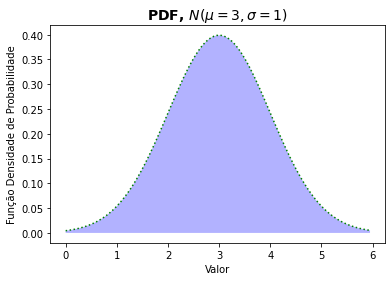

In [136]:
from scipy.stats import norm, binom, t

def plotnorm(media = 3, sd = 1):

  prob = []

  x =  np.arange(0,media+3*sd,0.05)

  for xi in x:
    prob.append(norm.pdf(xi, loc=media, scale=sd))

  plt.plot(x,prob,c='green',linewidth=1.5,linestyle=':')
  plt.fill_between(x,prob, facecolor='blue', alpha=0.3)    
  plt.xlabel('Valor')
  plt.ylabel('Função Densidade de Probabilidade')
  plt.title('PDF, $N(\mu= ' + str(media) + ', \sigma= ' + str(sd) + ') $', fontsize=14, weight='bold') 


plotnorm()  

Você não tem necessidade de saber fazer esse gráfico, ele está aqui apenas para que você possa visualizar melhor os cálculos de probabilidades.  

### **Exemplo 1**. Calculando a probabilidade de um valor. 

Para isso empregamos a função de probabilidade acumulada:

```
<dist>.cdf( )
```

Dada a distribuição acima, **qual a probabilidade de termos um bebê de até 2 Kg?**

0.15865525393145707


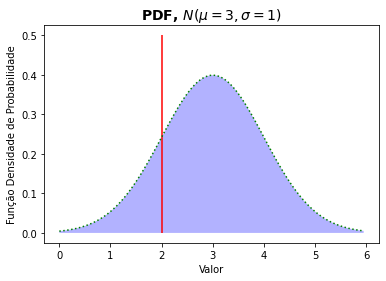

In [137]:
plotnorm(media = 3, sd = 1)

valor = norm.cdf(2, loc=3, scale=1)

print( valor )
plt.vlines( 2 , 0 , 0.5, color='r')
plt.show()

Os $0.1586$ ($15.86$%) é a probabilidade que corresponde a área à esquerda da linha vermelha. 

### **Exemplo 2**. Calculando o valor de uma probabilidade. 

Para isso empregamos a função inversa de probabilidade acumulada:

```
<dist>.ppf( )
```

Dada a distribuição acima, **qual o peso máximo que inclui 95% dos bebês?**

4.644853626951472


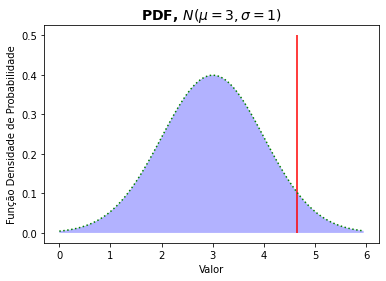

In [138]:
plotnorm(media = 3, sd = 1)

valor = norm.ppf(0.95, loc=3, scale=1)

print( valor )
plt.vlines( valor , 0 , 0.5, color='r')
plt.show()

Os $4.6448$ Kg é o valor do peso que abrange $95$% dos nascidos (área à esquerda da linha vermelha).

### **Exemplo 3**. Tente você.

**Qual a probabilidade de um bebê nascer exatamente entre 2 e 4 kg?**

Double-click **aqui** para ver a resposta.
<!-- Resposta:

norm.cdf(4, loc=3, scale=1) - norm.cdf(2, loc=3, scale=1)

-->

### **Exemplo 4**. Intervalo de Confiança.

Empregue a função `interval()` para verificar o intervalo da probabilidade obtida no exemplo anterior.

In [139]:
a,b = norm.interval(alpha=0.682689, loc=3, scale=1)
print(a,b)


2.000001016934666 3.999998983065334


## Histogramas e Gráficos de Densidade

Em princípio esses são ambos gráficos que exibem distribuições dos dados. O  primeiro exibe a frequência absoluta (as quantidades) de valores ou classes de valores dos dados. Os valores ou classes de valores devem ser um número discreto e as quantidades são representadas por faixas (barras) verticais ou horizontais. Um erro bastante comum é confundir histogramas com gráficos de barras.  Gráficos de barras são mais gerais e podem representar outras quantidades que não uma faixa de valores e suas frequências, incluindo relacionar variáveis diferentes. Um histograma, por outro lado, representa uma única variável em duas dimensões, seus valores e frequências.

O `Matplotlib` emprega a função `plt.hist()` para construir tanto histogramas como gráficos de densidade de probabilidade (PDF).

### Atrasos Aéreos

Vamos ver aqui um conjunto de dados sobre vôos e tempos de atraso ou antecipação de chegadas. Por simplicidade vamos nos referir sempre à *atrasos* de chegadas (`arr_delay`) independente do valor ser positivo (atraso) ou negativo (antecipação). 

In [140]:
flights = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/flights_delays_2015.csv')
flights.head()


,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,12.0,United Air Lines Inc.
3,7.0,United Air Lines Inc.
4,-14.0,United Air Lines Inc.


In [141]:
flights['arr_delay'].describe()

count    297001.000000
mean          1.282629
std          28.880222
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

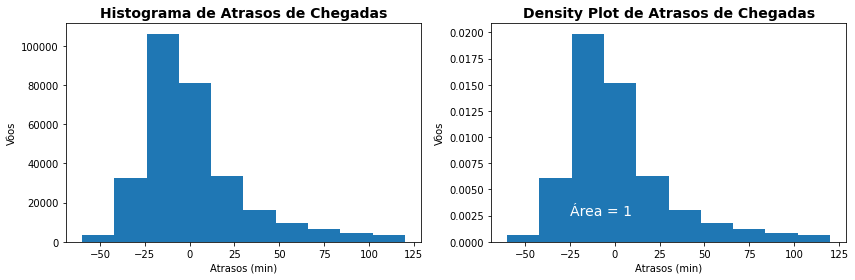

In [142]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'])

# Anotações
plt.title('Histograma de Atrasos de Chegadas', fontsize=14, weight='bold')  
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True')

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')  
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')
plt.text(-25,0.0025,'Área = 1',c='white',fontsize=14)

plt.tight_layout()
plt.show()

Ambos os gráficos acima exibem a mesma forma. Mas o primeiro apresenta no eixo `y` a frequência (quantidade absoluta) dos vôos para as respectivas faixas de atraso das chegadas do eixo `x`. Como o parâmetro `density=True` o gráfico exibe a mesma forma, mas os valores são reescalados de forma que a área abaixo do gráfico tenha valor $1$ representando, assim, a razão ou a densidade de probabilidade dos valores.

Em quaisquer casos fica evidente uma **distribuição com assimetria negativa** ou *calda à direita*, com valores mais concentrados à esquerda o quê, em geral, nos diz que a média dos dados é menor que sua mediana. 

Você também pode observar que existe uma quantidade maior de vôos com chegada antecipada que vôos com atrasos e, embora não vamos aqui calcular essa probabilidade, a probabilidade de chegarmos adiantados no nosso destino é maior que a de chegarmos com atraso. Várias outras análises podem ser feitas somente observando o gráfico de distribuição e podemos em seguida refinar essas análises buscando o cálculo exato das probabilidades. 



Acima deixamos que o `Matplotlib` definesse as classes de valores a serem exibidas. Mas você pode empregar o parâmetro `bins` para definir uma quantidade de classes de valores como abaixo.

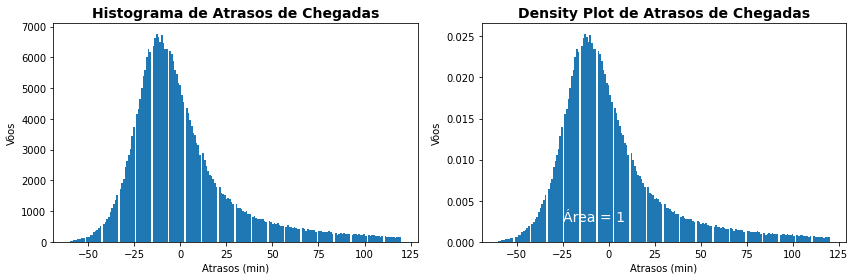

In [143]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=200)

# Anotações
plt.title('Histograma de Atrasos de Chegadas', fontsize=14, weight='bold')  
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True',bins=200)

# Anotações
plt.title('Density Plot de Atrasos de Chegadas', fontsize=14, weight='bold')  
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')
plt.text(-25,0.0025,'Área = 1',c='white',fontsize=14)

plt.tight_layout()
plt.show()

Se no lugar de definir a quantidade de intervalos você quiser definir o tamanho da faixa de intervalos a ser empregada o procedimento já não será tão direto, mas é simples. Isso pode ser feito de modo prático dividindo-se o intervalo total de valores pela medida do intervalo de valores desejado. Você encontra esse procedimento a seguir. 

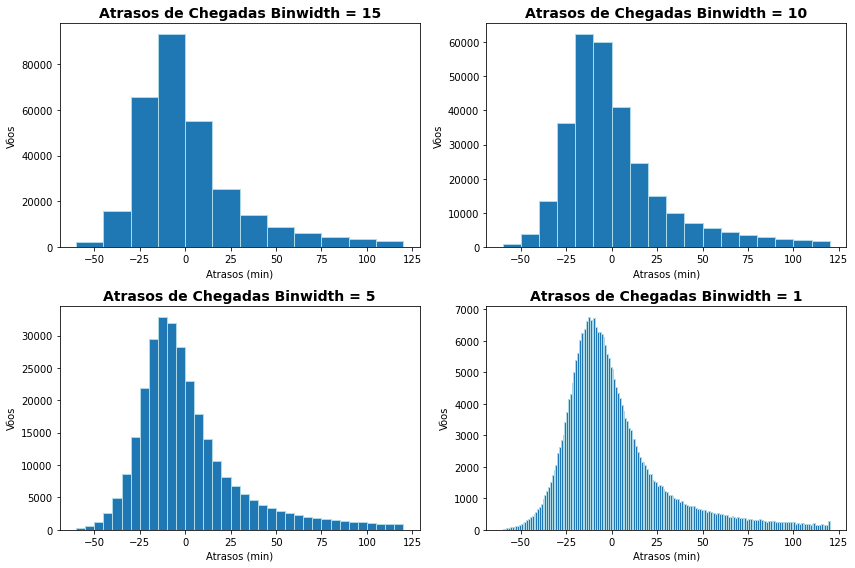

In [144]:
plt.figure(figsize=(12,8))

for i, binwidth in enumerate([15, 10, 5, 1]):
  plt.subplot(2, 2, i + 1)

  interval = flights['arr_delay'].max() - flights['arr_delay'].min()
  plt.hist(flights['arr_delay'],bins=int(interval/binwidth),edgecolor = 'lightblue')

  # Anotações
  plt.title('Atrasos de Chegadas Binwidth = %d' % binwidth, fontsize=14, weight='bold')  
  plt.xlabel('Atrasos (min)') 
  plt.ylabel('Vôos')

plt.tight_layout()
plt.show()  

Os `bins` correspondem a quantidade dos intervalos de valores que estamos interessados. A medida que aumentamos a quantidade de intervalos o gráfico de barras se aproxima de um gráfico de valores contínuos. 


## Histograma e Densidade Acumulada

Tanto o histograma como o gráfico de densidade podem produzidos para exibirem valores acumulativos. Isso parece fazer mais sentido para o gráfico de densidade, mas para o histograma é uma forma direta de fornecer resposta a perguntas como *quantos vôos tiveram atraso até 15 min?*

Com o **gráfico de probabilidade acumulada**, mesmo sem fazer o cálculo,  podemos *ver* e estimar com bastante proximidade a probabilidade de um vôo ter até no máximo 15min de atraso (no caso 0.8, ou 80%).


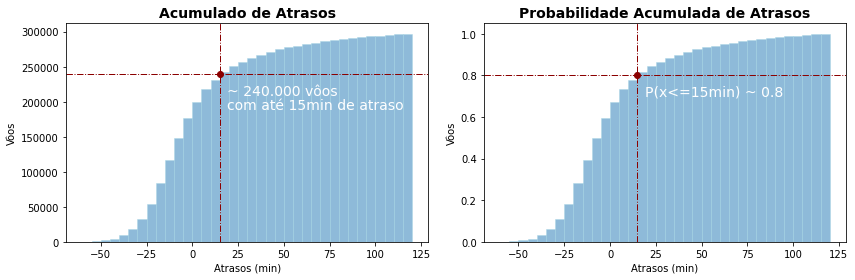

In [145]:
plt.figure(figsize=(12,4))

binwidth=5

plt.subplot(1,2,1)
plt.hist(flights['arr_delay'],bins=int(interval/binwidth),edgecolor = 'lightblue',cumulative=True,alpha=0.5)

plt.axvline(15,linewidth=1,linestyle='-.',color='darkred') 
plt.axhline(240000, linewidth=1,linestyle='-.',color='darkred')   
plt.plot(15,240000,'o',color='darkred')  
plt.text(19, 210000, '~ 240.000 vôos', fontsize=14,color='w') 
plt.text(19, 190000, 'com até 15min de atraso', fontsize=14,color='w') 

# Anotações
plt.title('Acumulado de Atrasos', fontsize=14, weight='bold')  
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')

plt.subplot(1,2,2)
plt.hist(flights['arr_delay'],density='True',bins=int(interval/binwidth),edgecolor = 'lightblue',cumulative=True,alpha=0.5)

# Anotações
plt.title('Probabilidade Acumulada de Atrasos', fontsize=14, weight='bold')  
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')

plt.axvline(15,linewidth=1,linestyle='-.',color='darkred') 
plt.axhline(0.8, linewidth=1,linestyle='-.',color='darkred')   
plt.plot(15,0.8,'o',color='darkred')  
plt.text(19, 0.7, 'P(x<=15min) ~ 0.8', fontsize=14,color='w') 

plt.tight_layout()
plt.show()

## Distribuições com o pacote `seaborn`*

A biblioteca `Seaborn` oferece uma opção direta para estimativa da densidade de kernel. A função `distplot()` agrega todas essas funcionalidades para gráficos em *nível de figura*. Sendo um gráfico em nível de figura, não podemos usar essa função referenciando eixos ou empregar o `subplot()` da interface direta para criar múltiplos plots, sendo necessário empregar um esquema próprio do `Seaborn` de gráficos em *grid* (`facegrid`) que não trataremos aqui. Essas mesmas funções estão disponíveis separadamente e podemos igualmente empregá-las para gráficos simples ou múltiplos como empregamos até aqui:

```
histplot() = displot(... kind="hist")
kdeplot() = displot(... kind="kde")
ecdfplot() = displot(... kind="ecdf")
```

$\rightarrow$ *Cuidado: O `Seaborn` ainda possui a função `distplot()` (nome muito semelhante ao `displot()`!). Essa função está obsoleta e deve ser removida em futuras versões. Prefira, portanto, a função `displot()`, para uma função de nível de figura ou as funções individuais acima para gráficos no nível dos eixos.*  



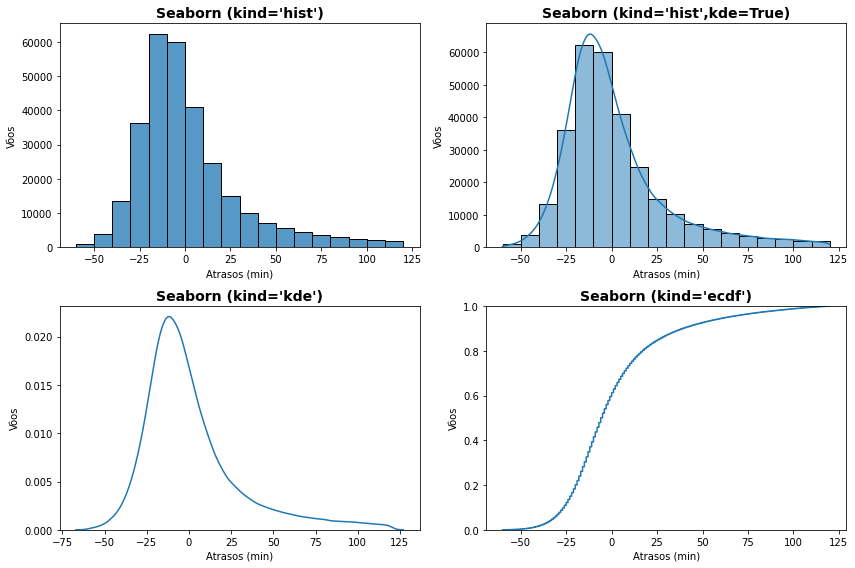

In [146]:
plt.figure(figsize=(12,8))
binwidth=10

plt.subplot(2,2,1)
sns.histplot(data=flights, x='arr_delay', bins=int(interval/binwidth))
plt.title('Seaborn (kind=\'hist\')', fontsize=14, weight='bold') 
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')

plt.subplot(2,2,2)
sns.histplot(data=flights, x='arr_delay', bins=int(interval/binwidth), kde=True)
plt.title('Seaborn (kind=\'hist\',kde=True)', fontsize=14, weight='bold') 
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')

plt.subplot(2,2,3)
sns.kdeplot(data=flights, x='arr_delay')
plt.title('Seaborn (kind=\'kde\')', fontsize=14, weight='bold') 
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')

plt.subplot(2,2,4)
sns.ecdfplot(data=flights, x='arr_delay')
plt.title('Seaborn (kind=\'ecdf\')', fontsize=14, weight='bold') 
plt.xlabel('Atrasos (min)') 
plt.ylabel('Vôos')

plt.tight_layout()
plt.show()

# Testes de Hipóteses 

Aqui nossa abordagem será bastante prática. Nossa apresentação de Testes de Hipóteses será, portanto, bastante *informal* supondo que o você já tem algum conhecimento sobre Testes de Hipóteses. 


Os **Testes de Hipóteses** são procedimentos estatísticos que permitem tomar uma decisão de aceitar ou rejeitar a hipótese nula $H_0$ entre duas ou mais hipóteses alternativas $H_i$ utilizando os dados observados.







![imagem](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Screenshot-from-2020-03-04-11-06-38.png)

## IC e Valor crítico $z_c$

Para amostra aleatória de tamanho suficientemente grande, os pontos finais da estimativa do intervalo no nível de confiança $(1 - \alpha )$ são dados por:

$$ \bar{x} \pm z_{c} \frac{\sigma}{\sqrt{n}} $$

onde $z_{c}$ é o percentil $(1 - \alpha / 2)$ da distribuição normal padrão.

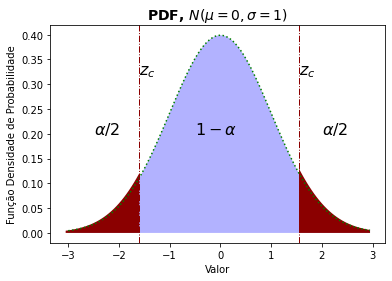

In [147]:
media = 0
sd = 1

prob = []

x =  np.arange(-media-3*sd,media+3*sd,0.05)

for xi in x:
  prob.append(norm.pdf(xi, loc=media, scale=sd))

fig = plt.figure(figsize=(6,4))

plt.plot(x,prob,c='green',linewidth=1.5,linestyle=':')
plt.fill_between(x,prob, facecolor='blue', alpha=0.3)    
plt.fill_between(np.arange(-3.05, -1.55, 0.05), prob[0:len(np.arange(-3.05, -1.55,0.05)+1)], facecolor='darkred')     
plt.fill_between(np.arange(1.55, 3.0, 0.05), prob[len(prob) - 1 - len(np.arange(-3.0, -1.55,0.05)+1):-1], facecolor='darkred')     

plt.xlabel('Valor')
plt.ylabel('Função Densidade de Probabilidade')
plt.title('PDF, $N(\mu=0, \sigma=1)$', fontsize=14, weight='bold') 

plt.axvline(-1.60,linewidth=1,linestyle='-.',color='darkred') 
plt.axvline(1.55,linewidth=1,linestyle='-.',color='darkred') 

prob =[ ]

for xi in x:
  prob.append(norm.cdf(xi, loc=media, scale=sd))

plt.text(-2.5, 0.2 ,r'$\alpha / 2$', fontsize=16) 
plt.text(2.0, 0.2 ,r'$\alpha / 2$', fontsize=16) 
plt.text(-0.5, 0.2 ,r'$1 - \alpha$', fontsize=16) 

plt.text(-1.6, 0.32 ,r'$z_c$', fontsize=16) 
plt.text(1.55, 0.32 ,r'$z_c$', fontsize=16)

plt.show() 


Esses valores permitem trabalharmos com testes mono ou bicaldais.

## Decidindo entre o Z-Test e o t-test

![imagem](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Screenshot-from-2020-03-04-14-48-36.png)
![imagem](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Screenshot-from-2020-03-04-14-46-19.png)

![imagem](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Screenshot-from-2020-03-04-15-29-37.png)

Uma abordagem mais direta entretanto é empregarmos os valores p-values. Esse é o procedimento que empregaremos a seguir.


## Test t

Em probabilidade e estatística , a distribuição t de Student (ou simplesmente a distribuição t ) é qualquer membro de uma família de distribuições de probabilidade contínuas que surgem ao estimar a média de uma população normalmente distribuída em situações onde o tamanho da amostra é pequeno e o da população o desvio padrão é desconhecido. 

O **Teste t**, ou **Teste T de Student**, é um teste de Hipótese em que podemos comparar médias de duas populações verificando se a hipótese nula $H_0: \mu_1 = \mu_2$ é aceita ou rejeitada, aceitando então a hipótese alternativa $H_a: \mu_1 \neq \mu_2$. Isso tem uma série de usos práticos que você verá a seguir.

* Premissas 

> 1. As observações em cada amostra são independentes e identicamente distribuídas 
> 2. As observações em cada amostra são normalmente distribuídas.

* t-score

> O t-escore é a razão entre a diferença entre dois grupos e a diferença dentro dos grupos. Uma pontuação t grande indica que os grupos são diferentes. Um pequeno t-score indica que os grupos são semelhantes. Quando você executa um teste t, quanto maior o valor t, maior a probabilidade de os resultados serem repetíveis. 

* p-value

> Todo valor t tem um valor p para acompanhar. Um valor-p é a probabilidade de os resultados dos dados da amostra ocorrerem por acaso. Os valores P são de 0% a 100%. Por exemplo, um valor p de 0,05 significa que há apenas uma probabilidade de 5% de que os resultados de um experimento tenham acontecido por acaso.

* Tipos de Testes t?

> Existem vários tipos de Testes t, aqui para os nossos propósitos nos concentramos inicialmente em dois tipos de teste: 

> 1. Um teste t de uma amostra testa a média de um único grupo em relação a uma média conhecida.
> 1. Um teste t de amostras independentes compara as médias de dois grupos

## Outros Testes

Para outros testes estatísticos em Python recomendamos consultar o guia de referência rápida:

[Guide to Statistical Hypothesis Tests in Python](https://www.kaggle.com/shashwatwork/guide-to-statistical-hypothesis-tests-in-python#)

## Testes A/B 

Suponha que você deseja testar a eficiência de um certo medicamento para um tipo de gripe comum. Você pode administrar o medicamento a um grupo de pacientes (grupo de pacientes) e um placebo a outro grupo (chamado grupo de controle). Você pode então comparar os resultados, por exemplo o tempo médio de recuperação dos dois grupos. O **Test t** é então uma das formas de avaliar a diferença entre os grupos para a realização de **Testes A/B**. 

Os **Teste A/B** obviamente são bem mais complexos que isso e, principalmente, requerem um bom desenho dos experimentos incluido a definição das variáveis de controle do experimento. O exemplo que você verá fornecer apenas uma pequena ideia de como lidar com esses testes.

## Testes de Correlação 

Ou **Pearson's Correlation Test** é um teste de Hipótese em que queremos verificar se duas amostras são **linearmente dependentes**. As hipóteses são: 

$H_0: $ não são linearmente dependentes 

$H_a: $ são linearmente dependentes

Esse teste é fundamental para aplicarmos ou avaliarmos modelos lineares como você verá seguir. 

**Nota**: A correlação verifica apenas a dependência linear. Não obstante sua importância, rejeitar a hipótese de linearmente dependentes não elimina muitas outras formas de dependência (se quiser, pense em $y = x^2$, $y = cos(x)$ ou no quarteto de Anscomble).    

## **Caso:** `t-test` **Glassdoor Salaries**, A diferença de salário entre Homens e Mulheres é suficientemente significava?

Diferença da média salarial entre homens e mulheres na base Glassdoor é de 8514.73 ou 8.65 %. É uma diferença que, a primeira vista, parece ser significativa e nos levar a pensar que homens são privilegiados na companhia. Mas antes de respondermos que compara médias de diferentes grupos, vamos responder a uma outra pergunta que compara a média de salários (`income`) com uma média conhecida. 

In [148]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
%matplotlib inline

data = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Projects/glassdoordata.csv')
data.head()


,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


#### **Pergunta 1: ONE-SAMPLE, TWO-SIDED**. O Salário médio da empresa no ano passado foi de 95.900. Houve uma série de mudanças no último ano e a empresa está interessada em saber se os salários se mantêm ou não em média.


In [149]:
print('Média de Salário atual: ', data.income.mean())

Média de Salário atual:  94472.653


In [150]:
# import statistics
from scipy import stats

# t-test
s, p = stats.ttest_1samp(data.income, popmean=95900)
print('p-value: {:.4f}'.format(p))

if p < 0.05:
	print('Rejeita a Hipótese Nula')
else:
	print('Aceita a Hipótese Nula')
 


p-value: 0.0751
Aceita a Hipótese Nula


Você pode notar que `s` é a estatística com significância 0.05 para a distribuição normal e aplicando, 

$$ \bar{x} \pm t_{c} \frac{s}{\sqrt{n}} $$

Podemos obter o intervalo,



In [151]:
# Calcula o valor dos quartis para a distribuição com média 0
n = data.income.count()
t.ppf(0.025, df=n-1)


-1.962341461133449

In [152]:
t.ppf(0.975, df=n-1)

1.9623414611334487

In [115]:
sigma = data.income.std()/np.sqrt(n)

stats.t.interval(0.95,                        # Confidence level
                 df = n-1,                    # Degrees of freedom
                 loc = 95900,                 # Sample mean
                 scale= sigma)                # Standard dev estimate


(94327.68982005231, 97472.31017994769)

In [108]:
95900 + t.ppf(0.025,df=n-1) * sigma

94327.68982005231

In [109]:
95900 - t.ppf(0.025,df=n-1) * sigma

97472.31017994769

E podemos calcular as chances de ver um resultado tão extremo quanto aquele que observamos (conhecido como o valor p) passando a estatística t como o quantil para a função `stats.t.cdf ()`:

In [154]:
print(s)
t.cdf(s, df=n-1)*2 # p-value

-1.781418344322885


0.07514787054279379

**Conclusão**: Concluímos, portanto, que os salários não são diferentes e a diferença é resultado unicamente da variação natural dos valores. 

*Obviamente essa análise está sujeita a uma série de críticas não considerando uma série de fatores como inflação, alterações do mercado de trabalho, aumento de custos de MO etc. Mas vamos deixar isso para os economistas*


### **Pergunta 2: TWO-SAMPLE, TWO-SIDED**** A diferença de salário entre Homens e Mulheres é suficientemente significava?

Vamos agora a nossa pergunta inicial. A diferença da média salarial entre homens e mulheres na base Glassdoor é de 8514.73 ou 8.65 %. Essa é mesmo uma diferença significativa? 

...Média de Salários
Homens 98457.55
Mulheres 89942.82
Diferença da média salarial é de 8514.73 ou 8.65 %


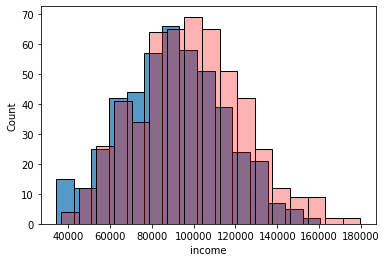

In [160]:
# EDA...

incomeFemale = data[data.gender == 'Female'].income
incomeMale = data[data.gender == 'Male'].income

print('...Média de Salários')
print('Homens {:.2f}'.format(incomeMale.mean()))
print('Mulheres {:.2f}'.format(incomeFemale.mean()))
print('Diferença da média salarial é de {:.2f} ou {:.2f} %'.format(
        incomeMale.mean() - incomeFemale.mean(), 100*(incomeMale.mean() - incomeFemale.mean())/ incomeMale.mean()))

sns.histplot(incomeFemale)
sns.histplot(incomeMale,color='r',alpha=0.3)
plt.show()

In [186]:
from scipy import stats  

s, p = stats.ttest_ind(incomeFemale, incomeMale, equal_var=False)
s, p

print('p-value: {:.4f}'.format(p))

if p < 0.05:
	print('Rejeita a Hipótese Nula')
else:
	print('Aceita a Hipótese Nula')

p-value: 0.0000
Rejeita a Hipótese Nula


O Scipy não tem qualquer forma explícita, até a versão que temos no Colab de testes unilaterais. O teste pode ser feito empregando-se o dobro do valor de p. Vemos assim que temos salários de fato, mais altos para homens.

In [188]:
incomeFemale.mean()

89942.81837606838

In [189]:
incomeMale.mean()

98457.54511278195

In [192]:
print( 2*p )
if 2*p < 0.05:
	print('Rejeita a Hipótese Nula')
else:
	print('Aceita a Hipótese Nula')



1.7437838491291326e-07
Rejeita a Hipótese Nula


**Conclusão**: Concluímos, portanto, há diferença significativa entre a remuneração de homens e mulheres na empresa que ganho mais que as mulheres.